In [1]:
import cv2
from tqdm import tqdm

In [2]:
def elements_gt_threshold(matrix, threshold):
    count = 0
    h, w = matrix.shape
    for i in range(h):
        for j in range(w):
            if matrix[i, j] > threshold:
                count += 1
    return count

In [3]:
threshold = 0.05
img = cv2.imread('90_4_down.jpg', 0)

In [4]:
mid_hw = [(50, 75)]
objects_count = 0
h, w = img.shape

result_list = []
res_dict = {}
for i in tqdm(range(h)):
    for j in range(w):
        # pool = Pool(processes=3)
        for hw in mid_hw:
            rect_h, rect_w = hw
            tal = rect_h * rect_w * threshold
            left = max(j - int(rect_w/2), 0)
            right = min(j + int(rect_w/2), w)
            up = max(i - int(rect_h / 2), 0)
            down = min(i + int(rect_h / 2), h)
            result = elements_gt_threshold(img[up:down, left:right], 150)
            if result > tal:
                objects_count += 1
                res_dict[result / (rect_h * rect_w)] = (left, right, up, down)

100%|██████████| 168/168 [04:07<00:00,  1.13it/s]


In [5]:
keys = res_dict.keys()
keys = sorted(keys, reverse=True)

In [6]:
print(res_dict[keys[0]])

(105, 179, 25, 75)


In [16]:
print(len(keys))

360


In [61]:
img = cv2.imread('90_4_down.jpg', 0)
for i in range(len(keys)):
    pos = res_dict[keys[i]]
    cv2.rectangle(img, (pos[0], pos[2]), (pos[1], pos[3]), (155), 1)

In [62]:
import matplotlib.pyplot as plt

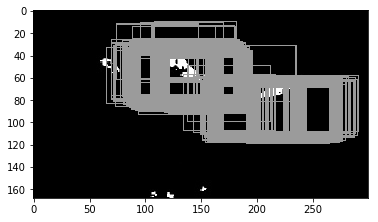

In [63]:
plt.figure()
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [64]:
cv2.imwrite('90_4_100box.jpg', img)

True

In [9]:
75*50

3750

In [10]:
import math

In [11]:
math.sqrt(3750)

61.237243569579455

In [60]:
51*1.5

76.5